# CLR Callback

In [1]:
from clr_callback import *
from tensorflow.keras.optimizers import *

## Test Set

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input

In [3]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)

model = Model(inp, x)

In [4]:
X = np.random.rand(2000000,15)

In [5]:
Y = np.random.randint(0,2,size=2000000)

## Callback test

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

The following tests callback functionality for each default Keras optimizer.

Tests demonstrate expected cyclical behavior, as well as functionality of resetting the cycles and/or adjusting boundary values.

In [7]:
clr_triangular = CyclicLR(mode='triangular')

In [8]:
for i in range(10):
    print(clr_triangular.clr())

0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001


### SGD

In [9]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

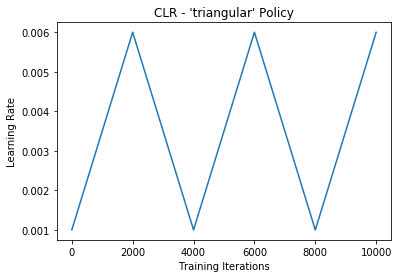

In [11]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [12]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [14]:
clr_triangular._reset()

In [15]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

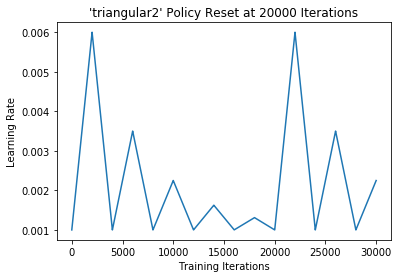

In [16]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("'triangular2' Policy Reset at 20000 Iterations")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [17]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

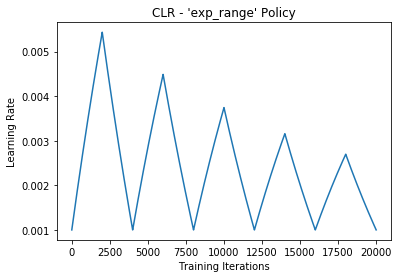

In [19]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [20]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [21]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

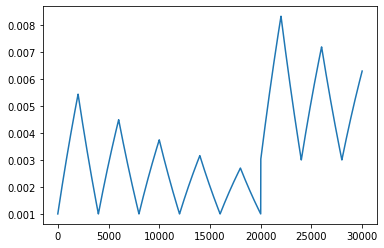

In [22]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [23]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [24]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

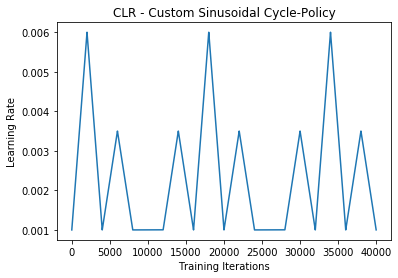

In [26]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Sinusoidal Cycle-Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [27]:
clr = lambda x: 1/(5**(x*0.0001))

In [28]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

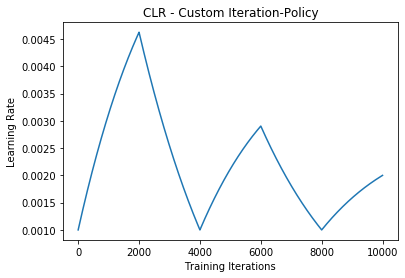

In [30]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Iteration-Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

### RMSprop

In [31]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

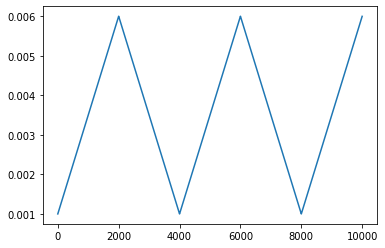

In [33]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [34]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [36]:
clr_triangular._reset()

In [37]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

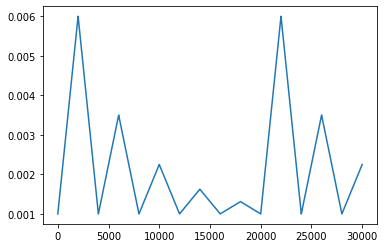

In [38]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [39]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

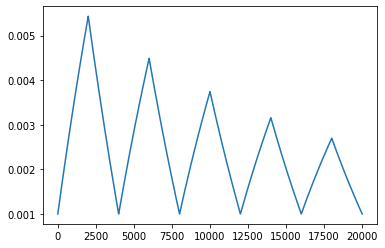

In [41]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [42]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [43]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

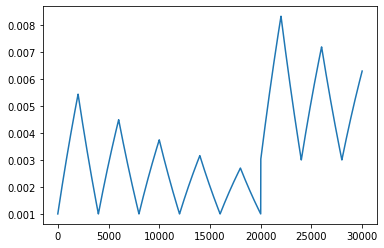

In [44]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [45]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [46]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

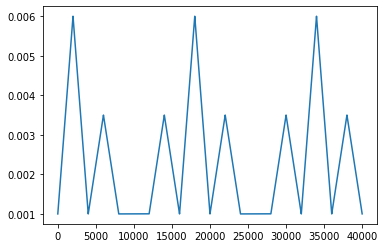

In [48]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [49]:
clr = lambda x: 1/(5**(x*0.0001))

In [50]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

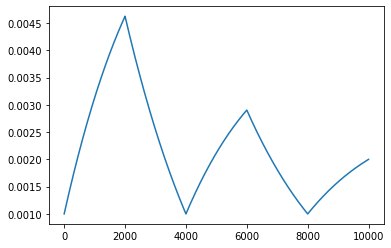

In [52]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adagrad

In [53]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

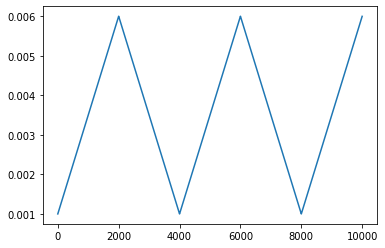

In [55]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [56]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [58]:
clr_triangular._reset()

In [59]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

TypeError: fit() got an unexpected keyword argument 'nb_epoch'

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adadelta

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adam

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adamax

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Nadam

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])
